In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')
df.head(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [3]:
df.shape

(213, 11)

In [4]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Define the new column names
new_columns = ['index_no','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Replace the column names
df.columns = new_columns

# Display the updated DataFrame with new column names
df.head()

,index_no,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df.reset_index()

,index,index_no,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
208,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [7]:
df.drop('index_no',axis=1,inplace=True)

In [8]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

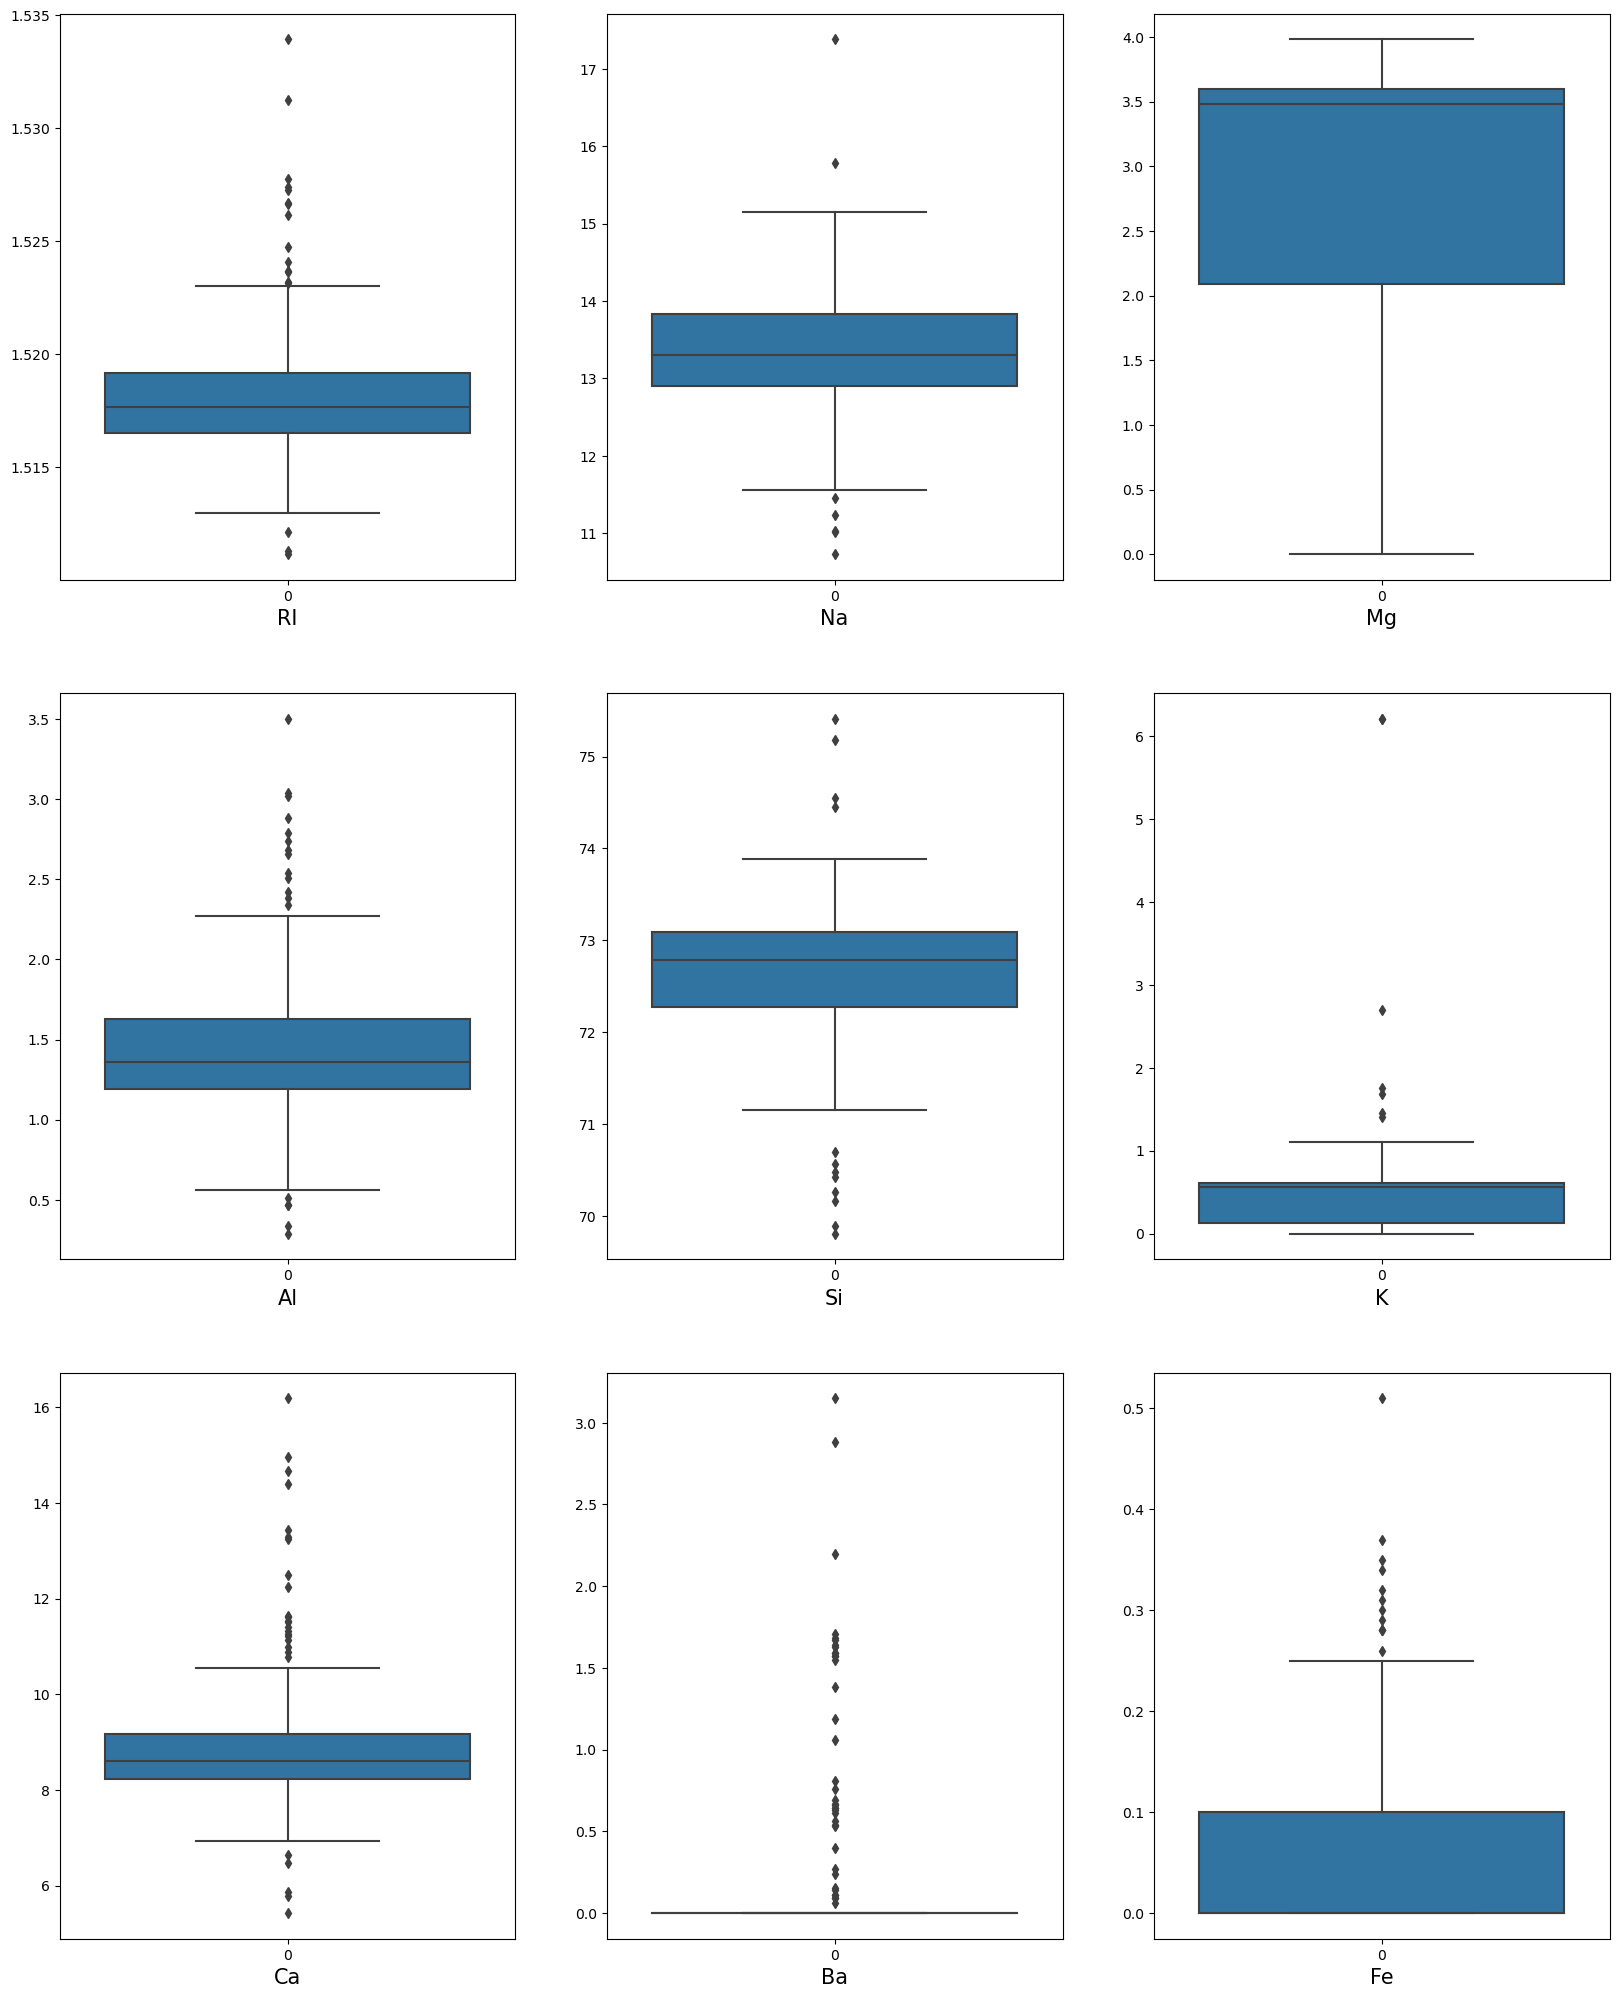

In [11]:
# visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [12]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

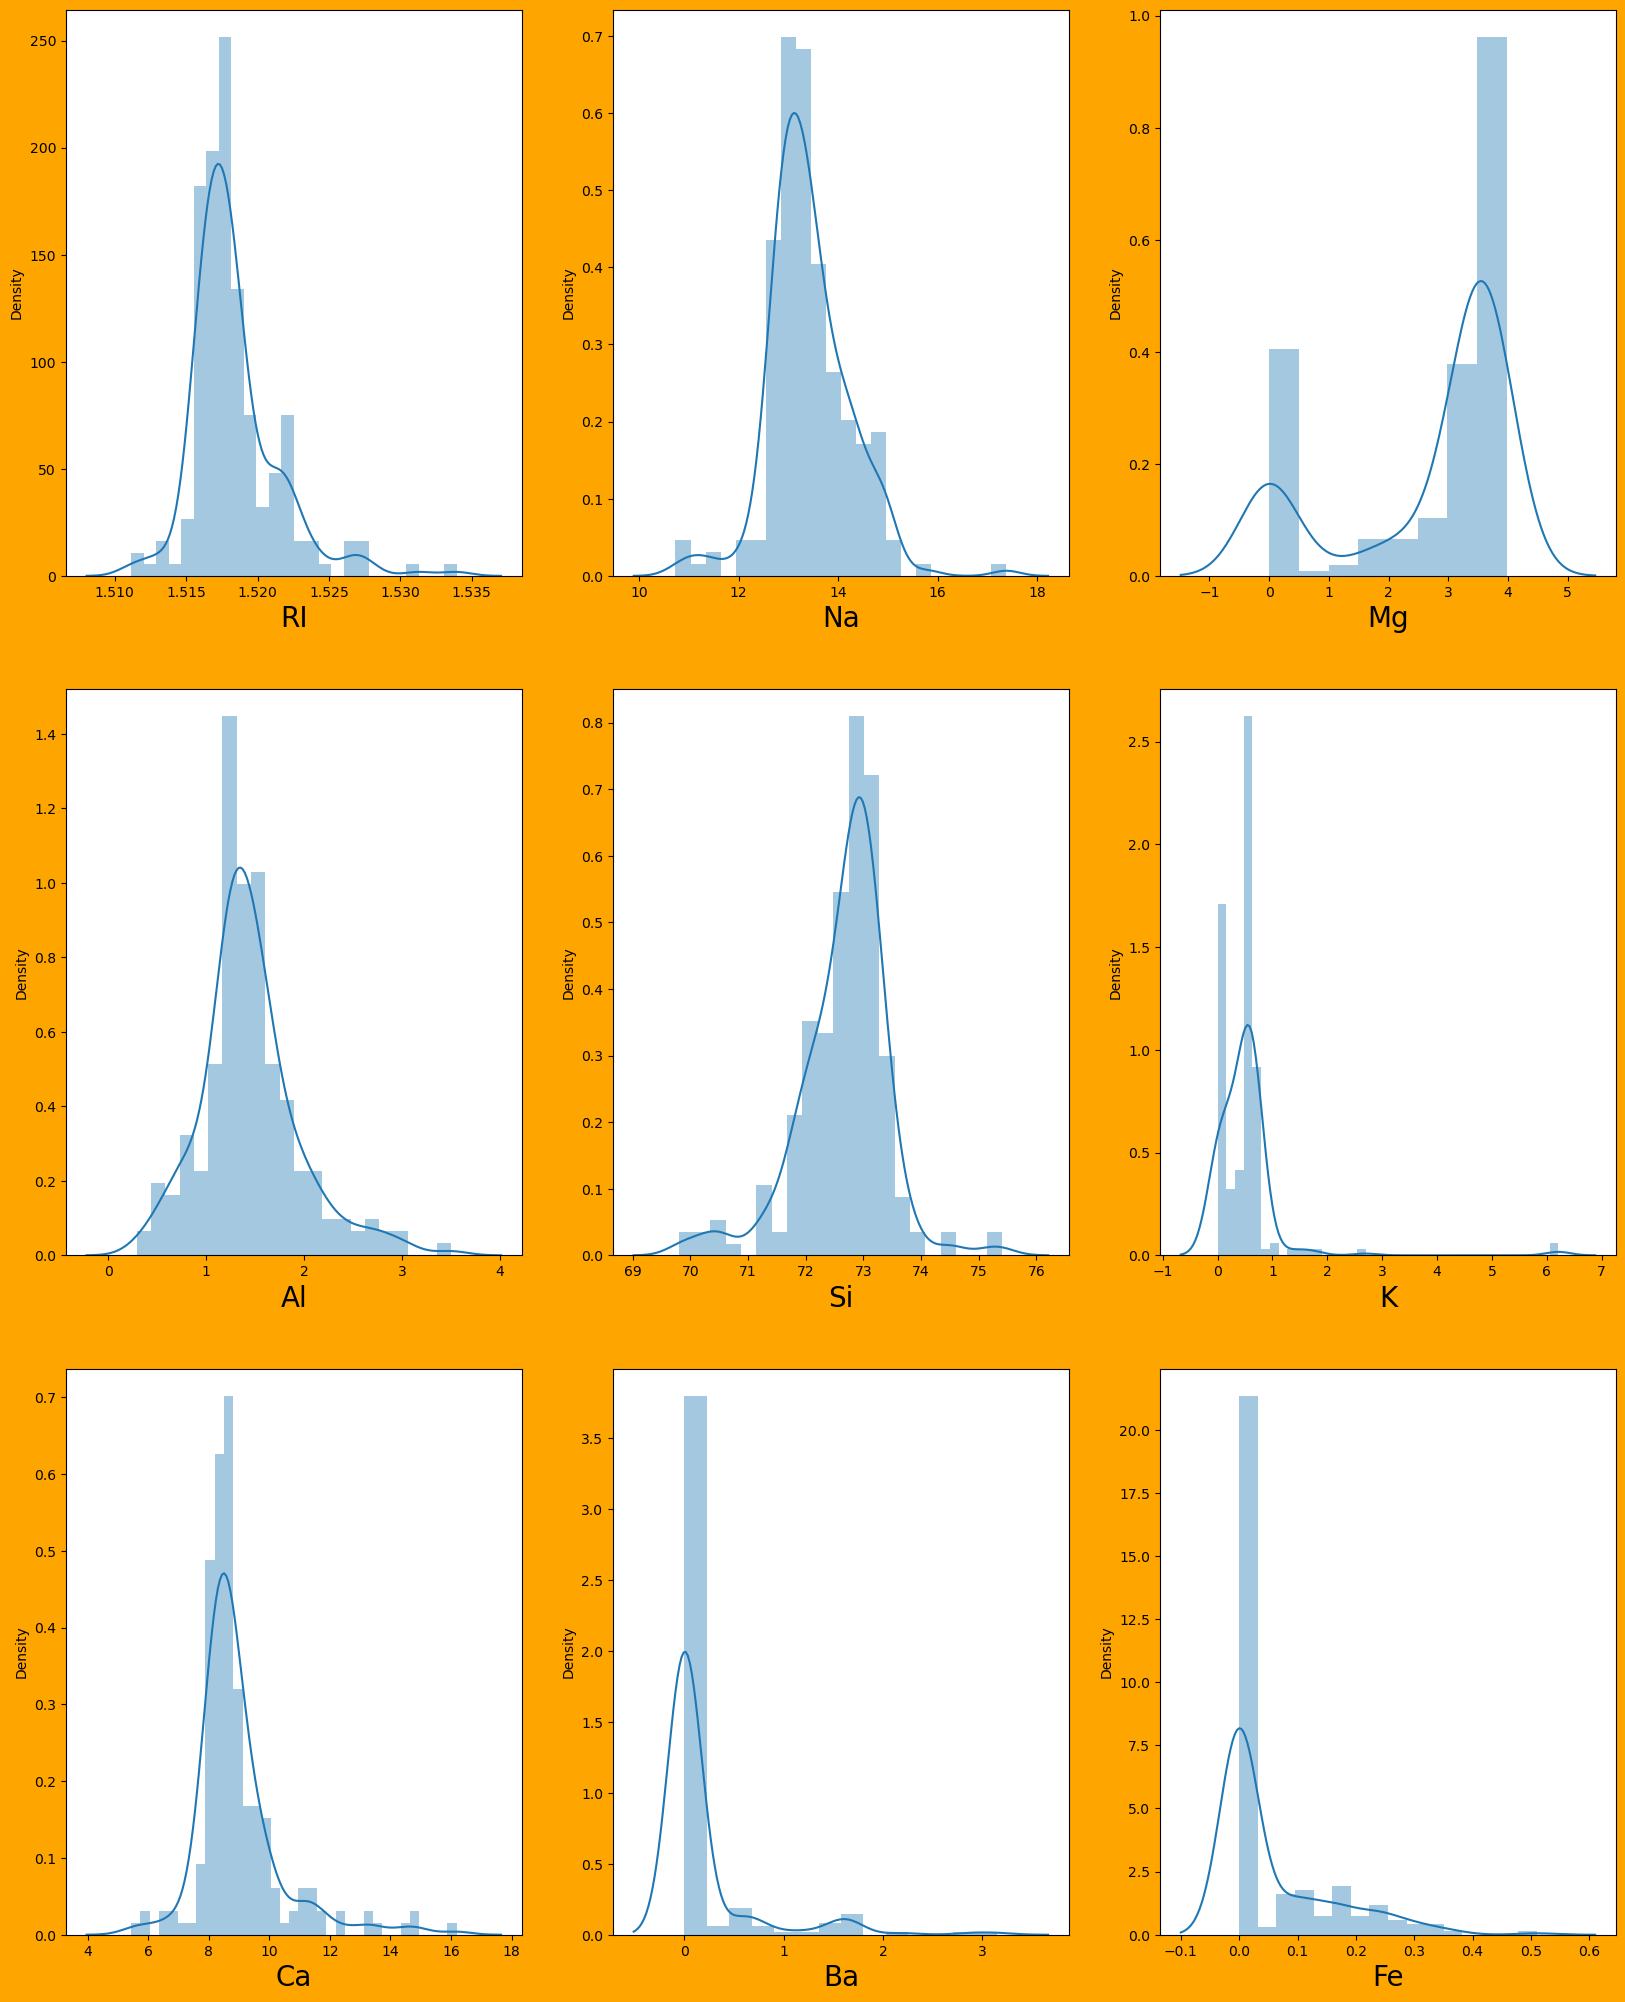

In [13]:
plt.figure(figsize=(20,25),facecolor='orange')
plotnumber=1
for column in df:
    if plotnumber<=9:
    # as there is 9 column in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [14]:
import numpy as np

# Define a function to handle outlier removal for multiple columns
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((df[column] < low_limit) | (df[column] > high_limit))
    
    # Drop rows with outliers
    df= df.drop(df.index[index])
    
    return df

# List of columns to handle outliers
columns_to_check = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Fe']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    df= remove_outliers(df, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = df.shape

# Reset index of the 'data' dataframe
df.reset_index(drop=True, inplace=True)


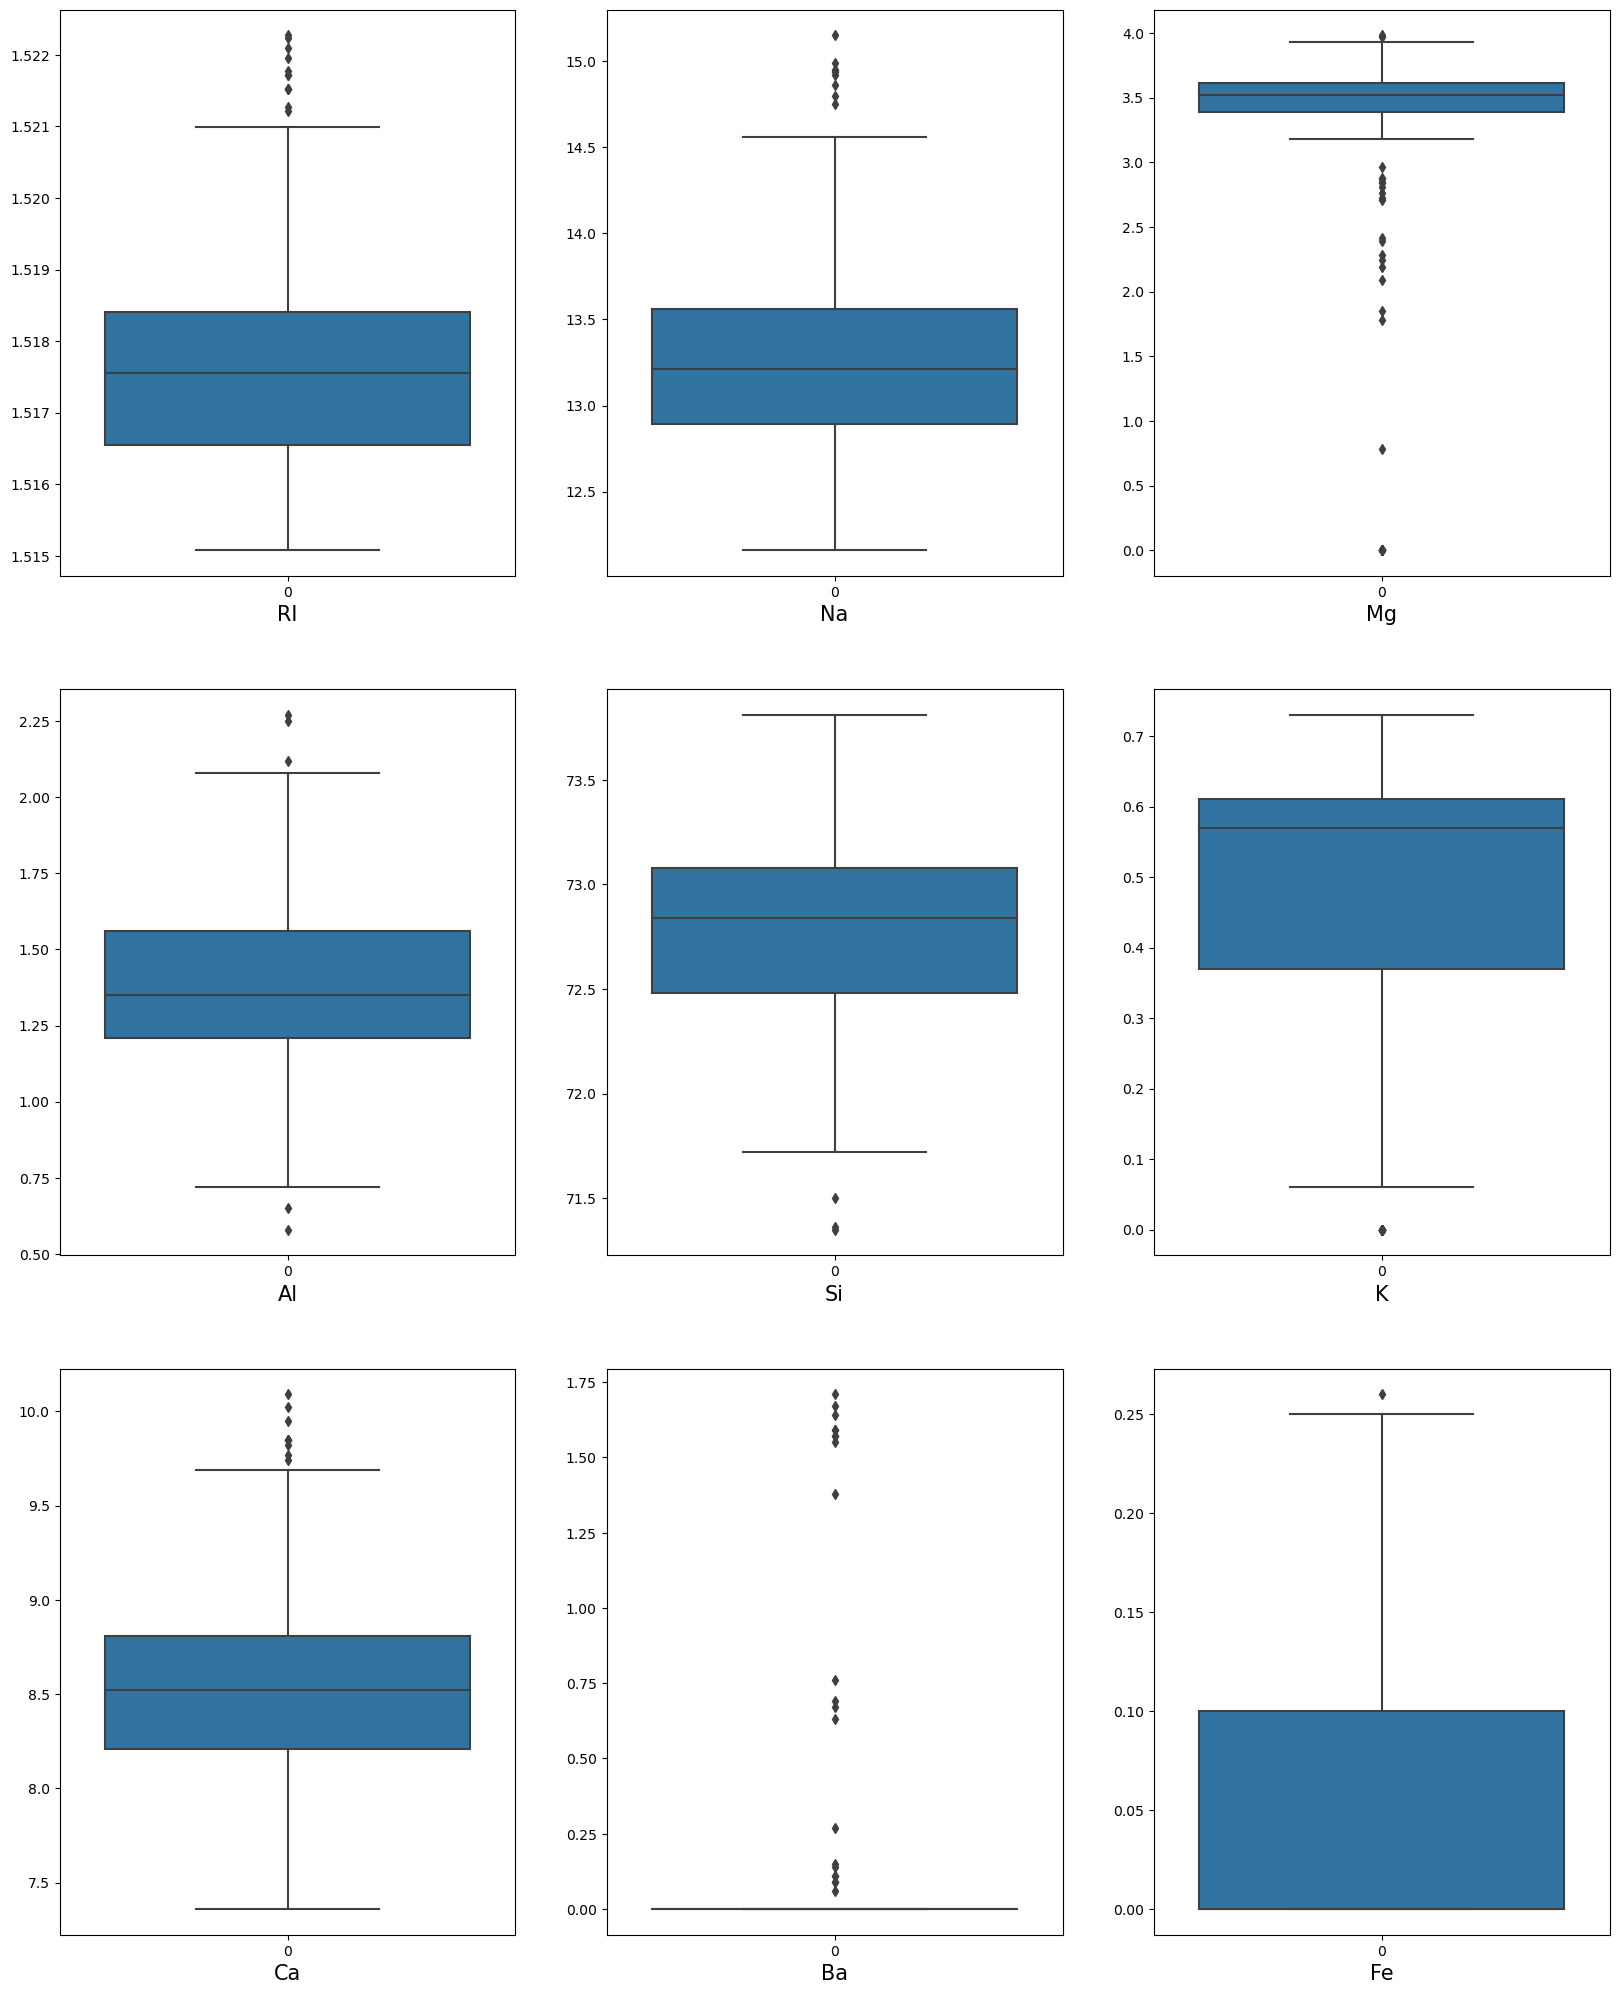

In [15]:
# visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

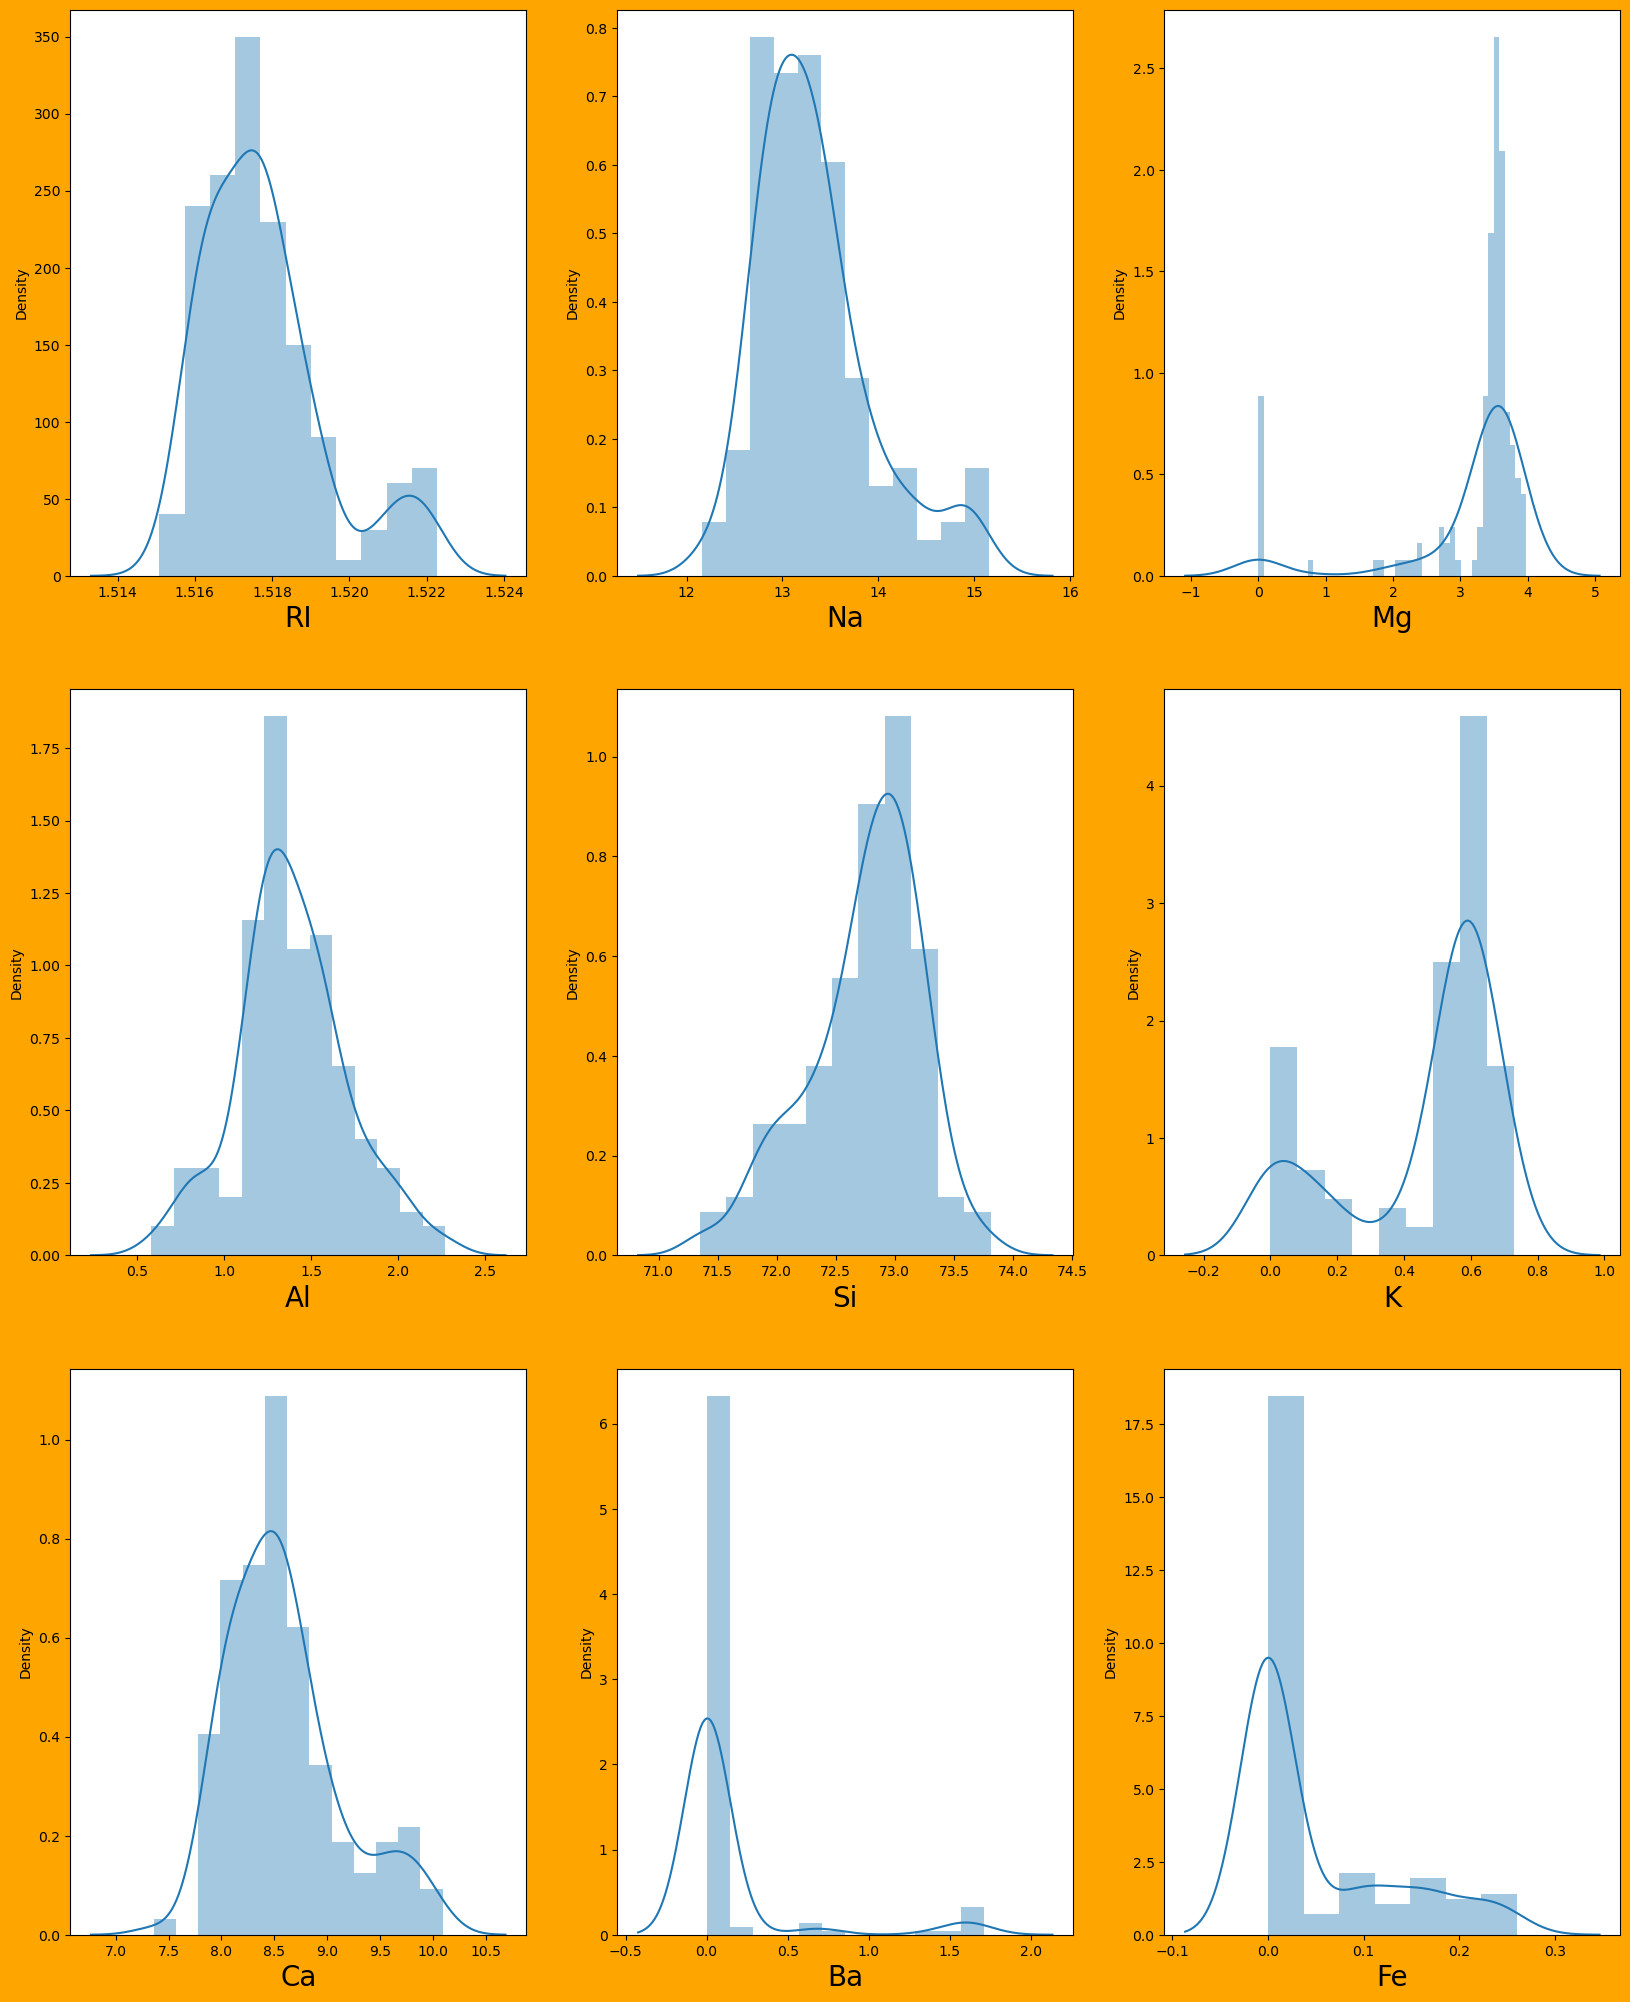

In [16]:
plt.figure(figsize=(20,25),facecolor='orange')
plotnumber=1
for column in df:
    if plotnumber<=9:
    # as there is 9 column in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [17]:
df.shape

(153, 10)

In [18]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [19]:
X=df.drop(columns=['Type'])
y=df['Type']

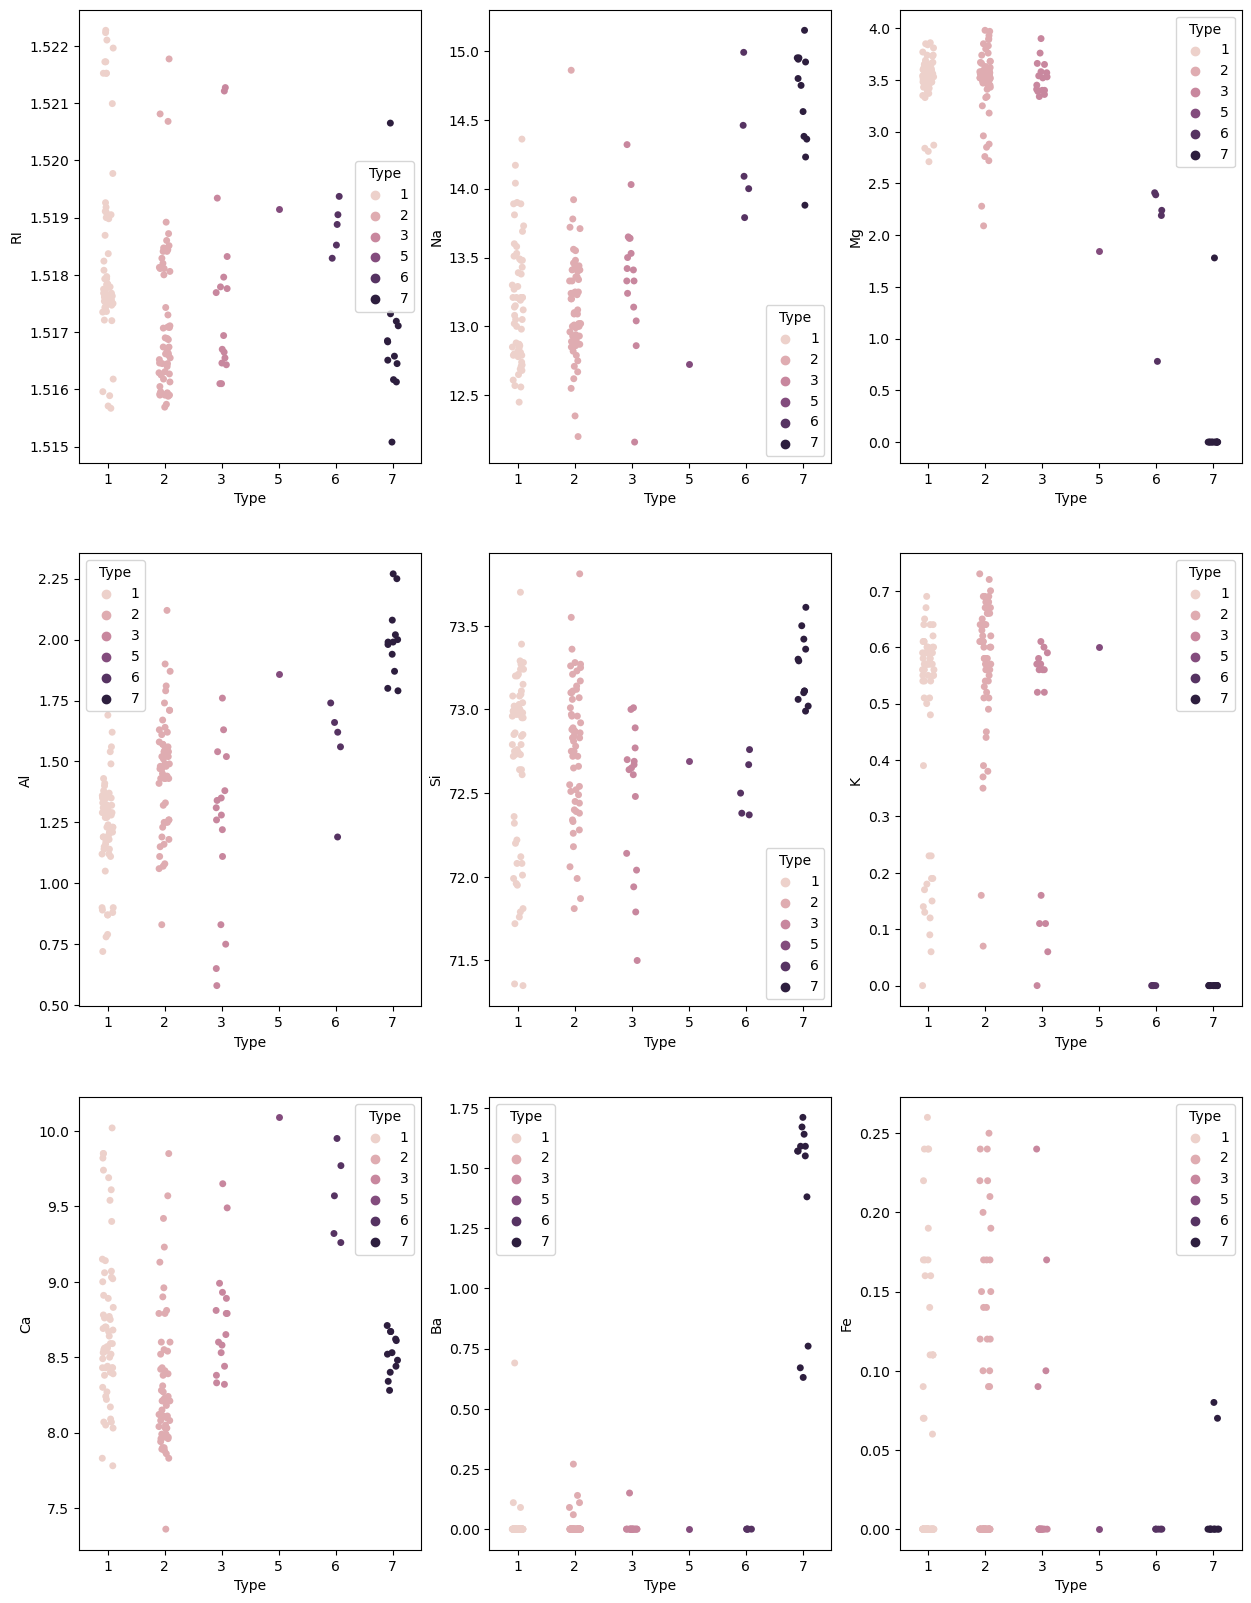

In [20]:
# lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column],hue=y)
    plotnumber+=1
plt.show()

In [21]:
correlation=X.corr()


<Axes: >

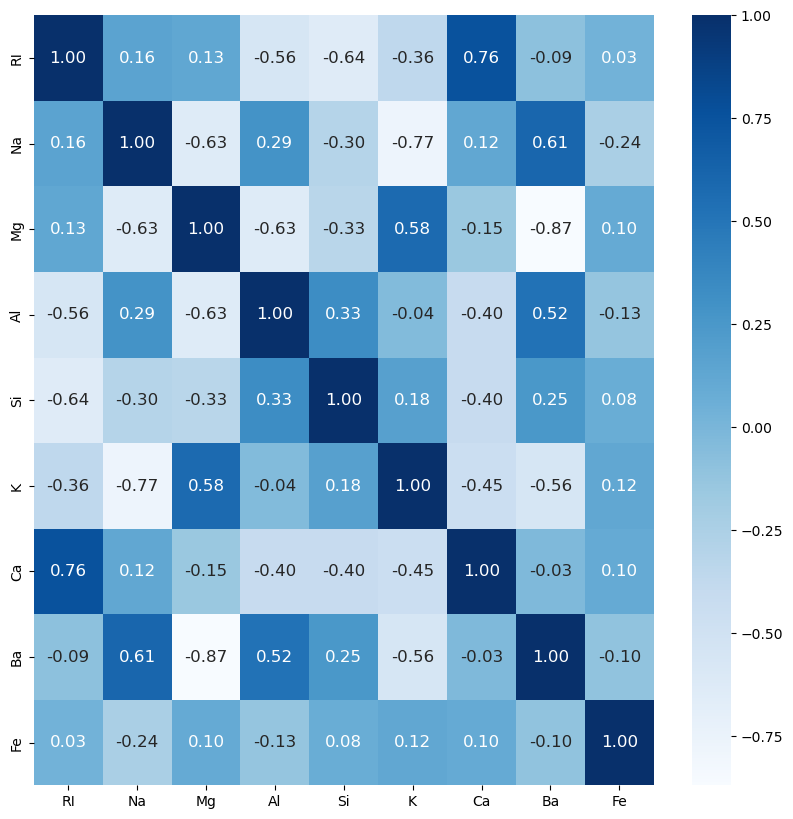

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.2f',annot_kws={'size':12},cmap='Blues')

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=355)

In [24]:
print(y.shape,y_train.shape,y_test.shape)

(153,) (114,) (39,)


In [25]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(RFC,X_train,X_test,Y_train,Y_test,train=True):
    if train:
        Y_pred=RFC.predict(X_train)
        print('\n==========================train result====================')
        print(f'accuracy score:{accuracy_score(y_train,Y_pred)*100:.2f}%')
    elif train==False:
        pred=RFC.predict(X_test)
        print('\n===========test result======================')
        print(f'accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n  \n test classification report \n',classification_report(Y_test,pred,digits=2))# model confidence/accuracy

In [27]:
# call the function and pass dataset to check train and test score
metric_score(RFC,X_train,X_test,y_train,y_test,train=True) # this is for training score
metric_score(RFC,X_train,X_test,y_train,y_test,train=False) # this is for testing score


==========================train result====================
accuracy score:100.00%

===========test result======================
accuracy score:79.49%

  
 test classification report 
               precision    recall  f1-score   support

           1       0.82      0.78      0.80        18
           2       0.79      0.85      0.81        13
           3       0.60      0.60      0.60         5
           7       1.00      1.00      1.00         3

    accuracy                           0.79        39
   macro avg       0.80      0.81      0.80        39
weighted avg       0.80      0.79      0.79        39



In [28]:
df.sample(20)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
94,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.00,0.00,2
98,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
88,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
46,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
75,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2
145,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
137,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00,6
83,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2
56,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1


In [29]:


# Get input data from the user for 9 features
input_data = input("Enter features separated by spaces: ")
input_data_list = input_data.split()  # Split the input into a list of strings

try:
    # Convert input data to a numpy array and reshape for 9 features
    input_data_as_numpy_array = np.asarray(input_data_list, dtype=float).reshape(1, -1)

    # Make prediction using the RandomForestClassifier model
    prediction = RFC.predict(input_data_as_numpy_array)

    # Classify the prediction into window glass or non-window glass
    if prediction[0] in [1, 2, 3, 4]:
        print('Predicted Class: Window Glass')
    elif prediction[0] in [5, 6, 7]:
        print('Predicted Class: Non-Window Glass')
    else:
        print('Unknown Class')

except ValueError:
    print("Error: Input data must be numeric. Please enter numeric values separated by spaces.")

Enter features separated by spaces: 1.51732	14.95	0.00	1.80	72.99	0.00	8.61	1.55	2.00
Predicted Class: Non-Window Glass
